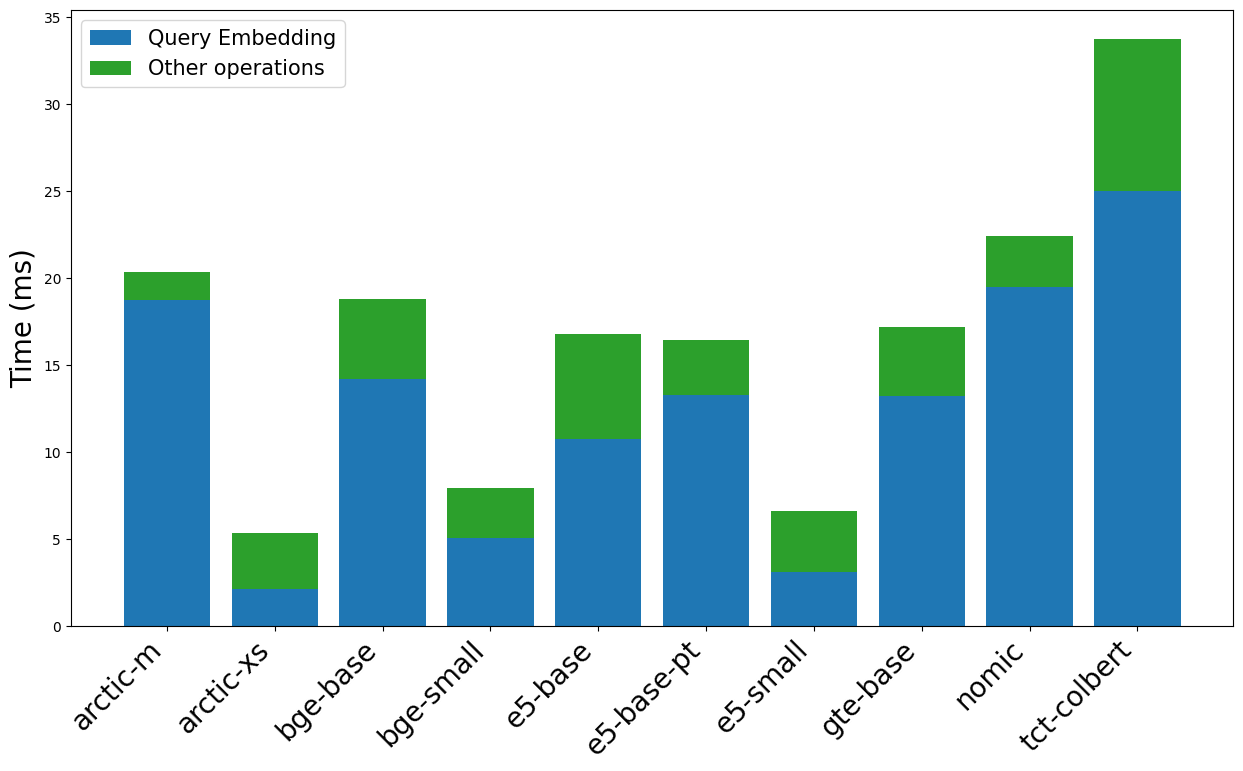

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Retrieve dataframe
import os, pandas as pd

# Usage
path_to_root = "/"
plots_path = os.path.abspath(os.getcwd()) + "/plots/"

path_to_root = os.path.abspath(os.getcwd()) + path_to_root
output_file = "aggreagated_latency_parts_results.csv"
output_file = path_to_root + output_file

df = pd.read_csv(output_file)

df = df[df['dataset'] == 'nfcorpus']

# Calculate the remaining latency
df['remaining_latency'] = df['total_latency'] - df['query_embedding']

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(15, 8))

# Define bar positions
bar_positions = range(len(df))

colors = {
    'query_embedding': '#1f77b4', 'remaining_latency': '#2ca02c'
}

# Plot the bars
ax.bar(bar_positions, df['query_embedding'], label='Query Embedding', color=colors['query_embedding'])
# # ax.bar(bar_positions, df['doc_retrieval'], bottom=df['query_embedding'], label='Embeddings Retrieval')
# ax.bar(bar_positions, df['remaining_latency'], bottom=df['query_embedding'] + df['doc_retrieval'], label='Other operations')

ax.bar(bar_positions, df['remaining_latency'], bottom=df['query_embedding'], label='Other operations', color=colors['remaining_latency'])

# Set labels and title
ax.set_ylabel('Time (ms)', fontsize=20)
# ax.set_title('Mean Time per Query by Component')
ax.set_xticks(bar_positions)
ax.set_xticklabels(df['model'], rotation=45, ha='right', fontsize=20)

ax.legend(fontsize=15)  # Increased the legend fontsize

# Show the plot
plt.show()


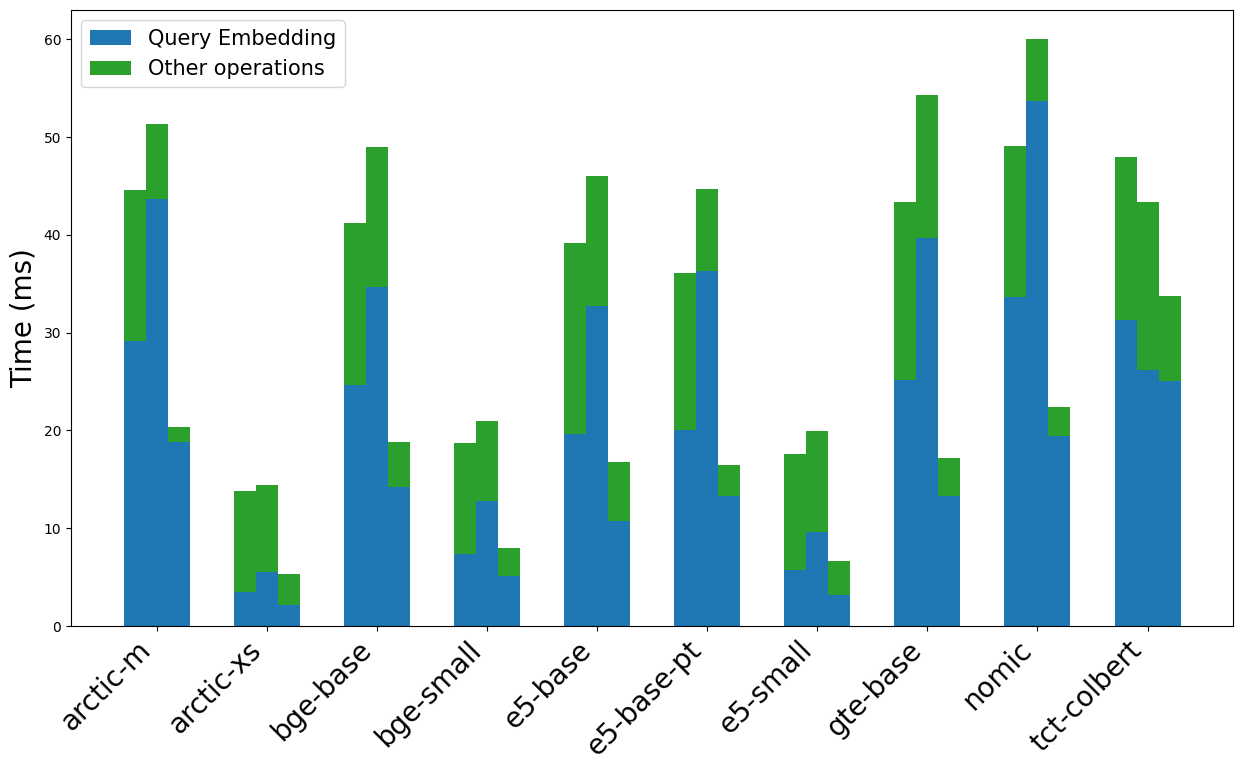

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Usage
path_to_root = "/"
path_to_root = os.path.abspath(os.getcwd()) + path_to_root
output_file = "aggreagated_latency_parts_results.csv"
output_file = path_to_root + output_file

# Load the data
df = pd.read_csv(output_file)

# Filter for the desired datasets
df = df[df['dataset'].isin(['nfcorpus', 'fiqa', 'scifact'])]

# Calculate the remaining latency
df['remaining_latency'] = df['total_latency'] - df['query_embedding']

# Get unique models and datasets
models = df['model'].unique()
datasets = df['dataset'].unique()

# Define bar width and positions
bar_width = 0.2
bar_positions = {model: i for i, model in enumerate(models)}

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(15, 8))

# Define colors for the components
colors = {
    'query_embedding': '#1f77b4', 'doc_retrieval': '#ff7f0e', 'remaining_latency': '#2ca02c'
}

# Plot the bars for each dataset and model
for j, dataset in enumerate(datasets):
    dataset_df = df[df['dataset'] == dataset]
    for i, model in enumerate(models):
        model_df = dataset_df[dataset_df['model'] == model]
        if not model_df.empty:
            pos = bar_positions[model] + (j * bar_width)
            ax.bar(pos, model_df['query_embedding'].values[0], bar_width, color=colors['query_embedding'],
                   label='Query Embedding' if j == 0 and i == 0 else "")
            # ax.bar(pos, model_df['doc_retrieval'].values[0], bar_width, bottom=model_df['query_embedding'].values[0],
            #        color=colors['doc_retrieval'], label='Embeddings Retrieval' if j == 0 and i == 0 else "")
            # ax.bar(pos, model_df['remaining_latency'].values[0], bar_width,
            #        bottom=model_df['query_embedding'].values[0] + model_df['doc_retrieval'].values[0],
            #        color=colors['remaining_latency'], label='Other operations' if j == 0 and i == 0 else "")

            ax.bar(pos, model_df['remaining_latency'].values[0], bar_width,
                   bottom=model_df['query_embedding'].values[0] ,
                   color=colors['remaining_latency'], label='Other operations' if j == 0 and i == 0 else "")

# Set labels and title
ax.set_ylabel('Time (ms)', fontsize=20)
# ax.set_title('Mean Time per Query by Component and Dataset')
ax.set_xticks([pos + bar_width for pos in bar_positions.values()])
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=20)
ax.legend(fontsize=15)  # Increased the legend fontsize

# Show the plot
plt.show()


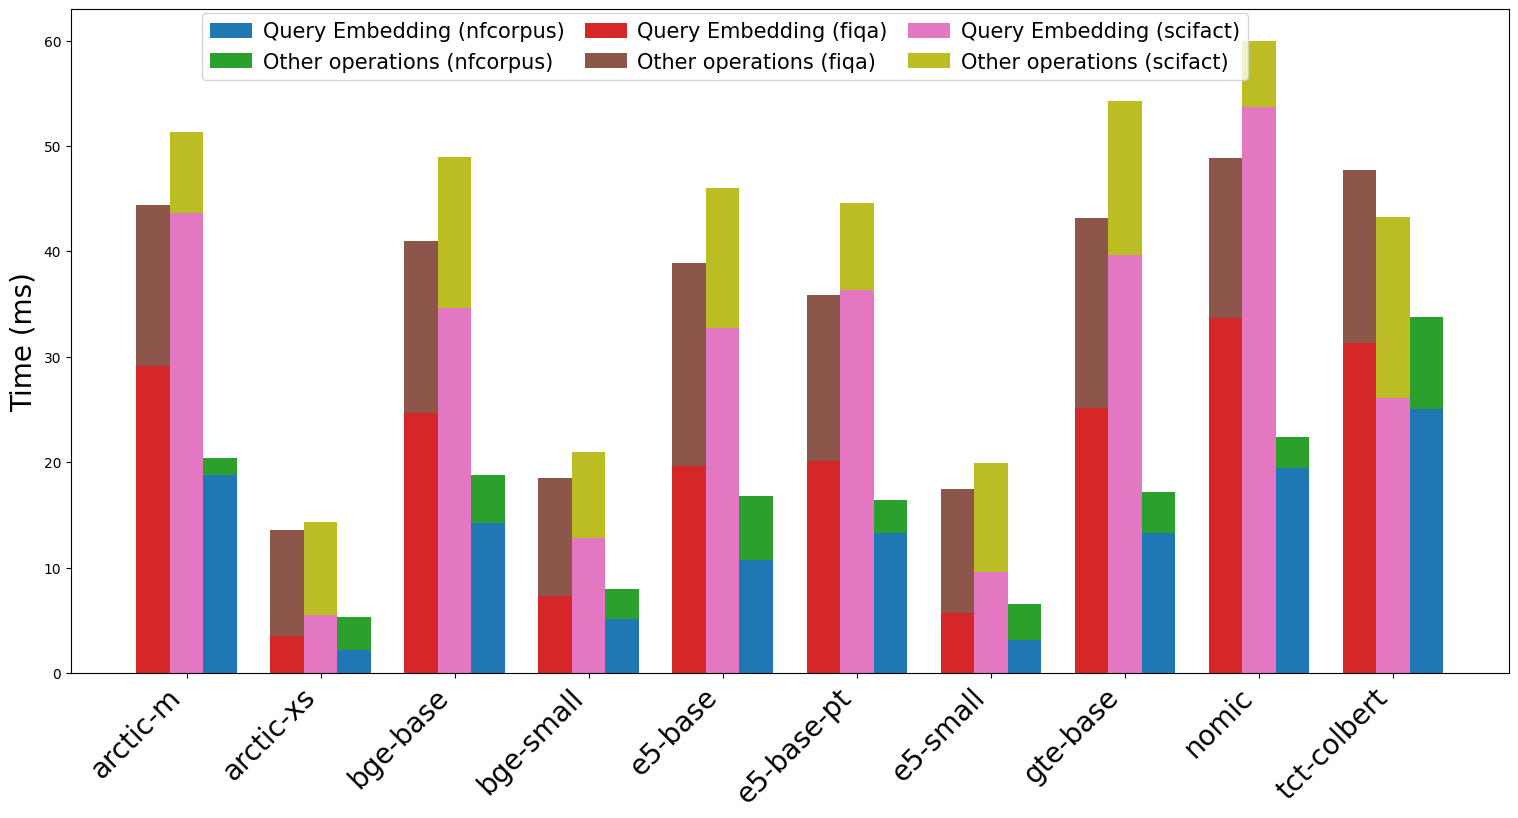

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.patches import Patch

# Usage
path_to_root = "/"
path_to_root = os.path.abspath(os.getcwd()) + path_to_root
output_file = "aggreagated_latency_parts_results.csv"
output_file = path_to_root + output_file

# Load the data
df = pd.read_csv(output_file)

# Filter for the desired datasets
df = df[df['dataset'].isin(['nfcorpus', 'fiqa', 'scifact'])]

# Calculate the remaining latency
df['remaining_latency'] = df['total_latency'] - (df['query_embedding'] + df['doc_retrieval'])

# Get unique models and datasets
models = df['model'].unique()
datasets = df['dataset'].unique()

# Define bar width and positions
bar_width = 1
# Adjust the positions for each model to include space for each dataset
bar_positions = {model: i * (len(datasets) + 1) for i, model in enumerate(models)}

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(15, 8))

# Define colors for each dataset's components
colors = {
    'nfcorpus': {'query_embedding': '#1f77b4', 'doc_retrieval': '#ff7f0e', 'remaining_latency': '#2ca02c'},
    'fiqa': {'query_embedding': '#d62728', 'doc_retrieval': '#9467bd', 'remaining_latency': '#8c564b'},
    'scifact': {'query_embedding': '#e377c2', 'doc_retrieval': '#7f7f7f', 'remaining_latency': '#bcbd22'}
}

# Plot the bars for each dataset and model
for i, model in enumerate(models):
    for j, dataset in enumerate(datasets):
        dataset_df = df[(df['dataset'] == dataset) & (df['model'] == model)]
        if not dataset_df.empty:
            pos = bar_positions[model] + j * bar_width
            ax.bar(pos, dataset_df['query_embedding'].values[0], bar_width, color=colors[dataset]['query_embedding'],
                   label=f'Query Embedding ({dataset})' if i == 0 and j == 0 else "")
            # ax.bar(pos, dataset_df['doc_retrieval'].values[0], bar_width,
            #        bottom=dataset_df['query_embedding'].values[0], color=colors[dataset]['doc_retrieval'],
            #        label=f'Embeddings Retrieval ({dataset})' if i == 0 and j == 0 else "")
            # ax.bar(pos, dataset_df['remaining_latency'].values[0], bar_width,
            #        bottom=dataset_df['query_embedding'].values[0] + dataset_df['doc_retrieval'].values[0],
            #        color=colors[dataset]['remaining_latency'],
            #        label=f'Other operations ({dataset})' if i == 0 and j == 0 else "")

            ax.bar(pos, dataset_df['remaining_latency'].values[0], bar_width,
                   bottom=dataset_df['query_embedding'].values[0],
                   color=colors[dataset]['remaining_latency'],
                   label=f'Other operations ({dataset})' if i == 0 and j == 0 else "")

# Set labels and title
ax.set_ylabel('Time (ms)', fontsize=20)
# ax.set_title('Mean Time per Query by Component and Dataset')
ax.set_xticks([bar_positions[model] + bar_width for model in models])
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=20)

# Create custom legend
legend_elements = [
    Patch(facecolor=colors['nfcorpus']['query_embedding'], label='Query Embedding (nfcorpus)'),
    Patch(facecolor=colors['nfcorpus']['remaining_latency'], label='Other operations (nfcorpus)'),
    Patch(facecolor=colors['fiqa']['query_embedding'], label='Query Embedding (fiqa)'),
    Patch(facecolor=colors['fiqa']['remaining_latency'], label='Other operations (fiqa)'),
    Patch(facecolor=colors['scifact']['query_embedding'], label='Query Embedding (scifact)'),
    Patch(facecolor=colors['scifact']['remaining_latency'], label='Other operations (scifact)')
]

ax.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.455, 1.01),
    fontsize="15",
    ncol=3,
    handletextpad=0.5,  # Adjust this value as needed
    columnspacing=1.0  # Adjust this value as needed
)

file_name = "all_datasets_multiple_colours_barcharts.png"
if file_name is not None:
        os.makedirs(os.path.dirname(plots_path + file_name), exist_ok=True)
        plt.tight_layout(pad=0.05)
        plt.savefig(plots_path + file_name, format='png', dpi=500)  # Save figure to file
# Show the plot
plt.show()


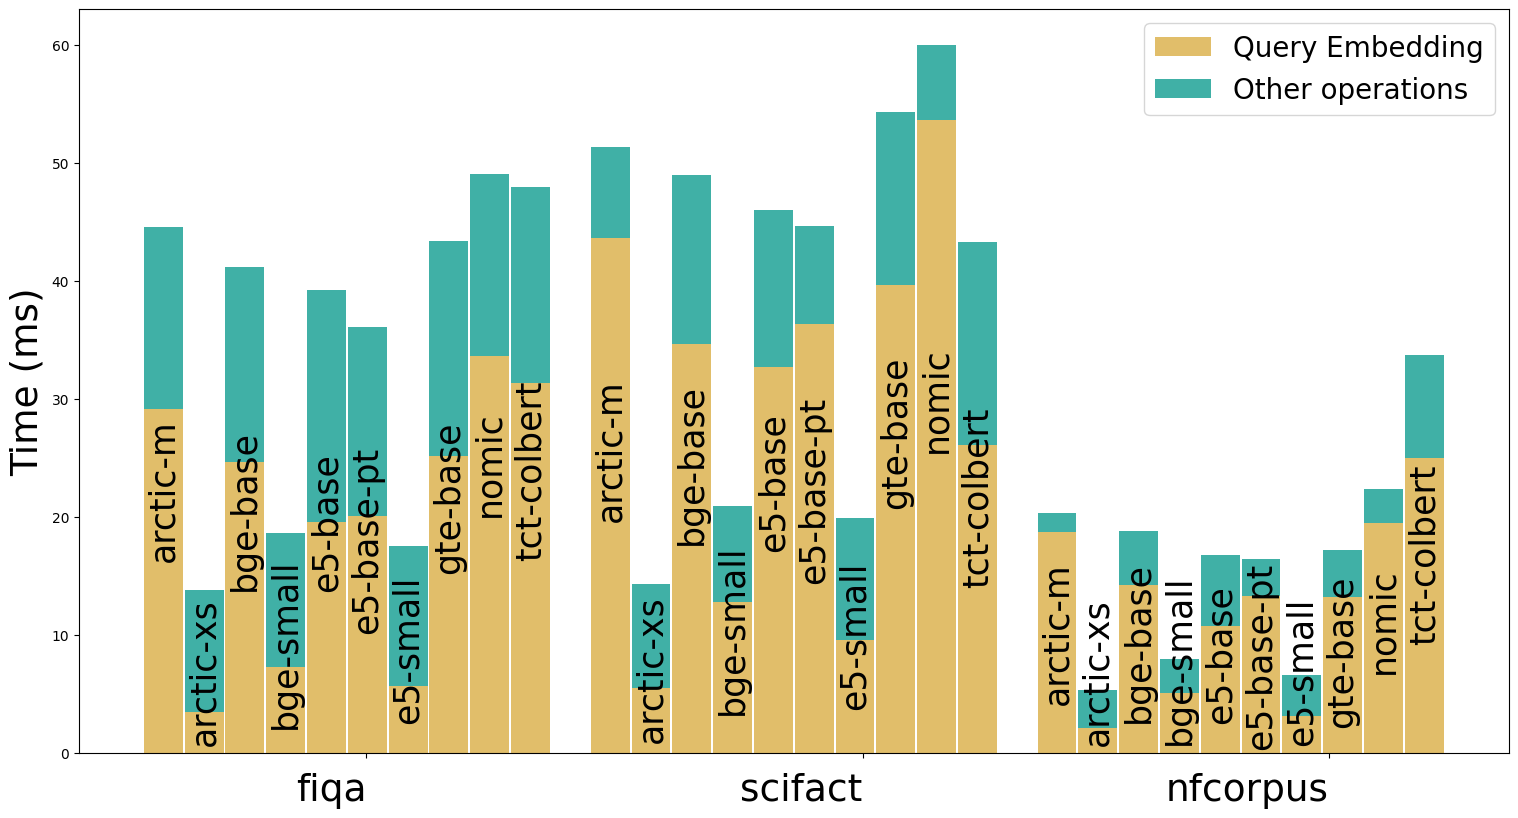

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Usage
path_to_root = "/"
path_to_root = os.path.abspath(os.getcwd()) + path_to_root
output_file = "aggreagated_latency_parts_results.csv"
output_file = path_to_root + output_file

# Load the data
df = pd.read_csv(output_file)

# Filter for the desired datasets
df = df[df['dataset'].isin(['nfcorpus', 'fiqa', 'scifact'])]

# Calculate the remaining latency
df['remaining_latency'] = df['total_latency'] - df['query_embedding']

# Get unique models and datasets
models = df['model'].unique()
datasets = df['dataset'].unique()

# Define bar width and positions
bar_width = 0.5
gap_between_datasets = 0.5  # Gap between different datasets
gap_between_models = 0.025   # Gap between models within the same dataset
bar_positions = {dataset: i * (len(models) * (bar_width + gap_between_models) + gap_between_datasets) for i, dataset in enumerate(datasets)}

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(15, 8))

# Define colors for the components
colors = {
    'query_embedding': '#E1BE6A', 'remaining_latency': '#40B0A6'
}



# Plot the bars for each dataset and model
for j, dataset in enumerate(datasets):
    dataset_df = df[df['dataset'] == dataset]
    for i, model in enumerate(models):
        model_df = dataset_df[dataset_df['model'] == model]
        if not model_df.empty:
            pos = bar_positions[dataset] + (i * (bar_width + gap_between_models))
            ax.bar(pos, model_df['query_embedding'].values[0], bar_width, color=colors['query_embedding'],
                   label='Query Embedding' if j == 0 and i == 0 else "")
            ax.bar(pos, model_df['remaining_latency'].values[0], bar_width,
                   bottom=model_df['query_embedding'].values[0],
                   color=colors['remaining_latency'], label='Other operations' if j == 0 and i == 0 else "")
            # Write model name vertically in the query_embedding bar

            position_percent = 0.5

            if dataset == 'nfcorpus':
                if model == 'arctic-xs':
                    position_percent = 1.3

                if model == 'bge-small':
                    position_percent = 1

                if model == 'e5-small':
                    position_percent = 1.05



            ax.text(pos, model_df['total_latency'].values[0] * position_percent, model, ha='center', va='center', color='black', fontsize=25, rotation=90)

# Set labels and title
ax.set_ylabel('Time (ms)', fontsize=27)

xtick_positions = [2.6125, 9, 15]
ax.set_xticks(xtick_positions)

ax.set_xticklabels(datasets, ha='right', fontsize=27)
ax.xaxis.set_tick_params(pad=10)
ax.legend(fontsize=20)  # Increased the legend fontsize


file_name = "all_datasets_vertical_names.png"
if file_name is not None:
        os.makedirs(os.path.dirname(plots_path + file_name), exist_ok=True)
        plt.tight_layout(pad=0.05)
        plt.savefig(plots_path + file_name, format='png', dpi=500)  # Save figure to file

# Show the plot
plt.show()
